<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/machine_learning_3_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 깨짐 해결: 아래 3줄 실행 후, 주석 처리 후 런타임 다시실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 나눔바른고딕체 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import pandas as pd
# 데이터 로드
from google.colab import drive
# 구글 인증 없이 옆에 파일-마운트 버튼으로 마운트
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/머신러닝/방송 인터넷 반응/인터넷반응DB.xlsx')

In [3]:
df.shape
# 데이터 행과 열의 전체 개수 확인 가능(전체 크기 파악)

(1420, 18)

In [4]:
# head()함수: 데이터의 내용을 위에서부터 보여줌
df.head()

,주차,프로그램명,채널명,요일,게시글,댓글,동영상조회,뉴스,동영상,게시글 비율,댓글 비율,동영상조회 비율,뉴스 비율,동영상 비율,가구,2049,가구 시청률,2049 시청률
0,202130,라디오스타,MBC,수,340,2781,989429,725,41,1.2,1.1,1.8,2.7,0.9,858997,545039,4.2,2.4
1,202130,알토란,MBN,일,251,885,1364,7,50,0.9,0.3,0.0,0.0,1.1,268796,107244,1.3,0.5
2,202130,엄지의제왕,MBN,화,56,75,2964,4,32,0.2,0.0,0.0,0.0,0.7,443094,115017,2.2,0.5
3,202130,이제 만나러 갑니다,채널A,일,22,78,31696,19,33,0.1,0.0,0.1,0.1,0.7,341943,111255,1.7,0.5
4,202130,불후의 명곡,KBS2,토,87,382,8246,45,14,0.3,0.2,0.0,0.2,0.3,0,0,0.0,0.0


In [5]:
# tail()함수: 데이터의 내용을 아래서부터 보여줌
df.tail()

,주차,프로그램명,채널명,요일,게시글,댓글,동영상조회,뉴스,동영상,게시글 비율,댓글 비율,동영상조회 비율,뉴스 비율,동영상 비율,가구,2049,가구 시청률,2049 시청률
1415,202140,라켓보이즈,tvN,월,263,6208,376399,426,2,0.5,1.0,0.4,1.4,0.0,0,0,0.0,0.0
1416,202140,끝내주는 연애,MBC every1,화,18,23,31327,241,1,0.0,0.0,0.0,0.8,0.0,0,0,0.0,0.0
1417,202140,오늘부터 무해하게,KBS2,목,16,18,4860,132,0,0.0,0.0,0.0,0.4,0.0,0,0,0.0,0.0
1418,202140,바퀴 달린 집3,tvN,목,51,158,121517,77,13,0.1,0.0,0.1,0.3,0.2,0,0,0.0,0.0
1419,202140,돌싱글즈2,MBN,일,53,103,3351,217,0,0.1,0.0,0.0,0.7,0.0,0,0,0.0,0.0


# 데이터 속성
- 주차
- 프로그램명
- 채널
- 요일
- 게시글
- 댓글
- 동영상 조회 수
- 뉴시 기사 수
- 동영상 노출 횟수
- 가구: 전체 가구 시청자의 시청 횟수
- 2049: 20세~49세 시청 횟수

In [6]:
# 결측값 확인
# 속성들의 관계 확인 전 결측값 확인 필요

df.isna()

,주차,프로그램명,채널명,요일,게시글,댓글,동영상조회,뉴스,동영상,게시글 비율,댓글 비율,동영상조회 비율,뉴스 비율,동영상 비율,가구,2049,가구 시청률,2049 시청률
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1416,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1417,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1418,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().sum() # isna()함수: 데이터 속성 안에 결측 값이 있는지 표시

주차          0
프로그램명       0
채널명         0
요일          0
게시글         0
댓글          0
동영상조회       0
뉴스          0
동영상         0
게시글 비율      0
댓글 비율       0
동영상조회 비율    0
뉴스 비율       0
동영상 비율      0
가구          0
2049        0
가구 시청률      0
2049 시청률    0
dtype: int64

In [8]:
df_c = df[['프로그램명', '게시글', '댓글', '동영상조회', '뉴스', '동영상', '가구 시청률', '2049 시청률']]
df_c

,프로그램명,게시글,댓글,동영상조회,뉴스,동영상,가구 시청률,2049 시청률
0,라디오스타,340,2781,989429,725,41,4.2,2.4
1,알토란,251,885,1364,7,50,1.3,0.5
2,엄지의제왕,56,75,2964,4,32,2.2,0.5
3,이제 만나러 갑니다,22,78,31696,19,33,1.7,0.5
4,불후의 명곡,87,382,8246,45,14,0.0,0.0
...,...,...,...,...,...,...,...,...
1415,라켓보이즈,263,6208,376399,426,2,0.0,0.0
1416,끝내주는 연애,18,23,31327,241,1,0.0,0.0
1417,오늘부터 무해하게,16,18,4860,132,0,0.0,0.0
1418,바퀴 달린 집3,51,158,121517,77,13,0.0,0.0


In [9]:
# 상관 계수 분석

df_c.corr()
# 데이터 속성들의 관련도를 -1에서 1까지의 숫자로 표현

,게시글,댓글,동영상조회,뉴스,동영상,가구 시청률,2049 시청률
게시글,1.000000,0.732922,0.833423,0.605500,0.476762,0.280211,0.452707
댓글,0.732922,1.000000,0.827957,0.382272,0.429538,0.168423,0.240800
동영상조회,0.833423,0.827957,1.000000,0.477566,0.521943,0.303124,0.443243
뉴스,0.605500,0.382272,0.477566,1.000000,0.469053,0.413029,0.536644
동영상,0.476762,0.429538,0.521943,0.469053,1.000000,0.399402,0.416659
가구 시청률,0.280211,0.168423,0.303124,0.413029,0.399402,1.000000,0.869859
2049 시청률,0.452707,0.240800,0.443243,0.536644,0.416659,0.869859,1.000000


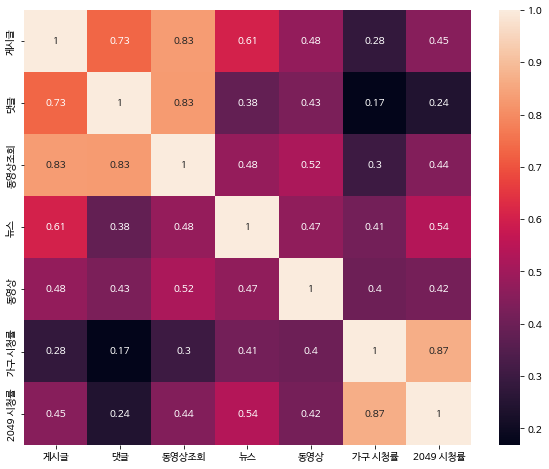

In [10]:
# 상관 계수 시각화

#전체 데이터에 대한 시청률 속성과 다른 속성들의 관계 시각화
import matplotlib.pyplot as plt
import seaborn as sns # 시본 라이브러리
plt.figure(figsize=(10,8))
sns.heatmap(df_c.corr(), annot=True)